In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [176]:
# Loads Car_Details CSV file
vecData = pd.read_csv("Car_Details.csv")

In [177]:
# Shows basic info about the dataset
vecData.info()
vecData.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [178]:
# Drops any rows that has missing values
cleanedData = vecData.dropna()

In [179]:
# Converts string to integers
cleanedData["seller_type"] = cleanedData["seller_type"].replace({"Individual": 1, "Dealer": 2, "Trustmark Dealer": 3})
cleanedData["fuel"] = cleanedData["fuel"].replace({"Diesel": 1, "Petrol": 2, "LPG": 3, "CNG": 4})
cleanedData["transmission"] = cleanedData["transmission"].replace({"Manual": 1, "Automatic": 2})
cleanedData["owner"] = cleanedData["owner"].replace({"First Owner": 1, "Second Owner": 2, "Third Owner": 3, "Fourth & Above Owner": 4, "Test Drive Car": 5})

<ipython-input-179-862bb893169c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData["seller_type"] = cleanedData["seller_type"].replace({"Individual": 1, "Dealer": 2, "Trustmark Dealer": 3})
<ipython-input-179-862bb893169c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData["fuel"] = cleanedData["fuel"].replace({"Diesel": 1, "Petrol": 2, "LPG": 3, "CNG": 4})
<ipython-input-179-862bb893169c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [180]:
# Loops through "mileage" and replaces unnecessary values to just the integers
for index, value in cleanedData["mileage"].items():
    value_str = str(value)
    if " kmpl" in value_str:
        cleanedData.at[index, "mileage"] = value_str.replace(" kmpl", "")
    elif " km/kg" in value_str:
        cleanedData.at[index, "mileage"] = value_str.replace(" km/kg", "")

# Loops through "engine" and replaces unnecessary values to just the integers
for index, value in cleanedData["engine"].items():
    value_str = str(value)
    if " CC" in value_str:
        cleanedData.at[index, "engine"] = value_str.replace(" CC", "")

# Loops through "max_power" and replaces unnecessary values to just the integers
for index, value in cleanedData["max_power"].items():
    value_str = str(value)
    if " bhp" in value_str:
        cleanedData.at[index, "max_power"] = value_str.replace(" bhp", "")

In [181]:
# Converts objects to integers
cleanedData["fuel"] = cleanedData["fuel"].astype(int)
cleanedData["seller_type"] = cleanedData["seller_type"].astype(int)
cleanedData["transmission"] = cleanedData["transmission"].astype(int)
cleanedData["owner"] = cleanedData["owner"].astype(int)
cleanedData["mileage"] = cleanedData["mileage"].astype(float)
cleanedData["engine"] = cleanedData["engine"].astype(int)
cleanedData["max_power"] = cleanedData["max_power"].astype(float)
cleanedData["seats"] = cleanedData["seats"].astype(int)

<ipython-input-181-badfbaf9037f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData["fuel"] = cleanedData["fuel"].astype(int)
<ipython-input-181-badfbaf9037f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData["seller_type"] = cleanedData["seller_type"].astype(int)
<ipython-input-181-badfbaf9037f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [182]:
cleanedData.info()
cleanedData.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   int64  
 5   seller_type    7906 non-null   int64  
 6   transmission   7906 non-null   int64  
 7   owner          7906 non-null   int64  
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   int64  
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   object 
 12  seats          7906 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.1+ MB


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248,74.00,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498,103.52,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5


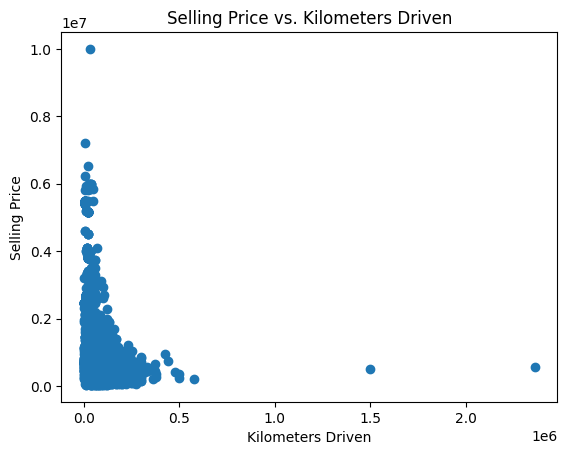

In [183]:
# Shows graph between kilometers driven vs. selling price
plt.scatter(cleanedData["km_driven"], cleanedData["selling_price"])
plt.title("Selling Price vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.show()

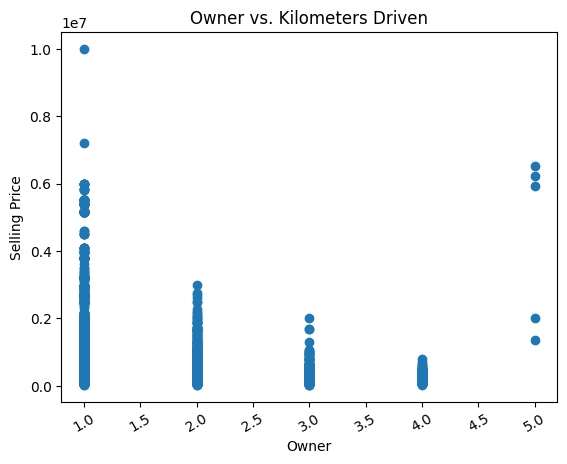

In [184]:
# Shows graph between owner vs. kilometers driven
plt.scatter(cleanedData["owner"], cleanedData["selling_price"])
plt.title("Owner vs. Kilometers Driven")
plt.xlabel("Owner")
plt.ylabel("Selling Price")
plt.xticks(rotation = 30)
plt.show()

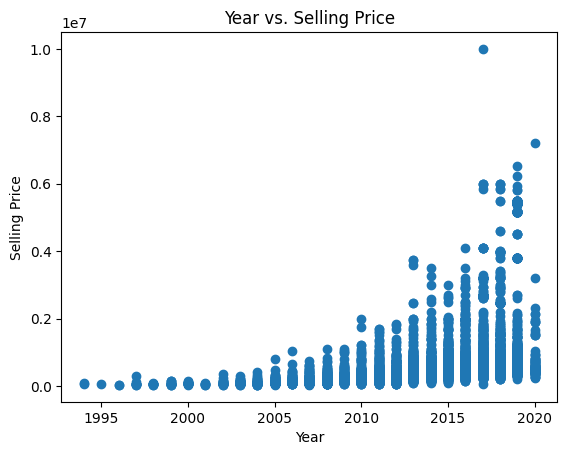

In [185]:
# Shows graph between year vs. selling price
plt.scatter(cleanedData["year"], cleanedData["selling_price"])
plt.title("Year vs. Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [186]:
# Splits the cleaned dataset into 70% training data and 30% temporary data
trainData, tempData = train_test_split(cleanedData, test_size = 0.3, random_state = 42)

# Splits the temporary data into 50% valid and 50% test data
validData, testData = train_test_split(tempData, test_size = 0.5, random_state = 42)

In [187]:
# Removes name, selling price, and torque from the data and sets selling price as the target variable
xTrain = trainData.drop(["name", "selling_price", "torque"], axis=1)
ytrain = trainData["selling_price"]

xValid = validData.drop(["name", "selling_price", "torque"], axis=1)
yValid = validData["selling_price"]

xTest = testData.drop(["name", "selling_price", "torque"], axis=1)
yTest = testData["selling_price"]

In [188]:
# Scales the features for all the x values
scaler = StandardScaler()
trainScaled = scaler.fit_transform(xTrain)
validScaled = scaler.transform(xValid)
testScaled = scaler.transform(xTest)

In [189]:
# Linear Regression model
linearReg = LinearRegression()
linearReg.fit(trainScaled, ytrain)

# Prediction for valid and test
testPrediction = linearReg.predict(testScaled)
validPrediction = linearReg.predict(validScaled)

# Evaluation for valid and test
print("Valid:")
print(f"Mean Absolute Error: {mean_absolute_error(yValid, validPrediction)}")
print(f"Mean Squared Error: {mean_squared_error(yValid, validPrediction)}")
print(f"R^2 Score: {r2_score(yValid, validPrediction)}")
print("--------------------------------------")
print("Test:")
print(f"Mean Absolute Error: {mean_absolute_error(yTest, testPrediction)}")
print(f"Mean Squared Error: {mean_squared_error(yTest, testPrediction)}")
print(f"R^2 Score: {r2_score(yTest, testPrediction)}")

Valid:
Mean Absolute Error: 270259.2939632777
Mean Squared Error: 219820858710.58664
R^2 Score: 0.6806624964300101
--------------------------------------
Test:
Mean Absolute Error: 267826.0842081516
Mean Squared Error: 219919915563.61353
R^2 Score: 0.6637475958829707


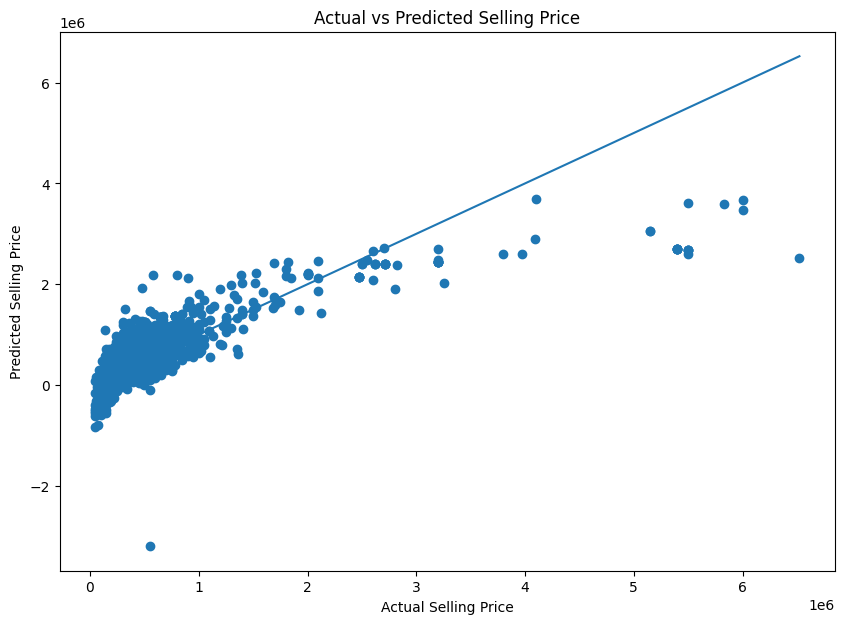

In [190]:
# Predicted vs Actual values
plt.figure(figsize=(10, 7))
plt.scatter(yTest, testPrediction)
plt.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()])
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

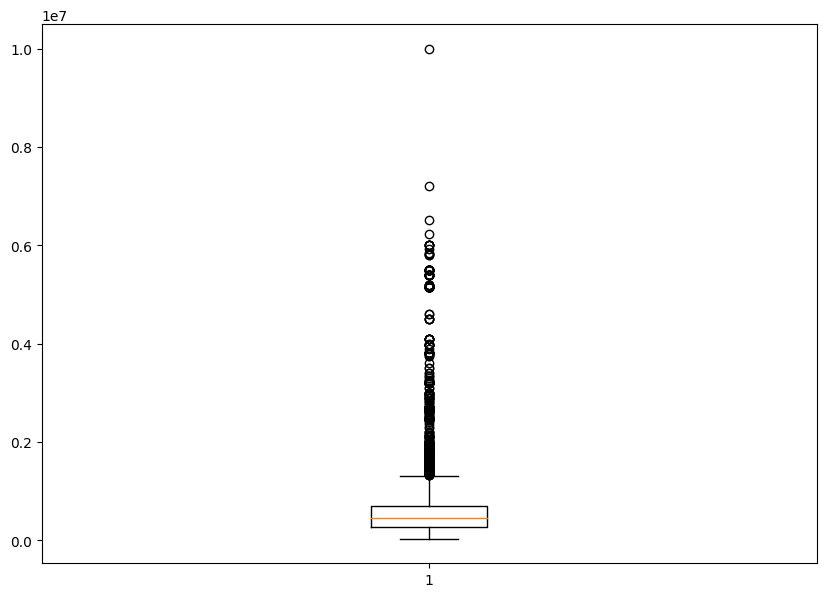

In [191]:
# Box plot selling_price column
plt.figure(figsize=(10, 7))
plt.boxplot(cleanedData["selling_price"])
plt.show()